In [17]:
X

array([ 1.02490833e+00,  8.21835464e-01,  1.51357226e-02, -1.29132110e+00,
        1.91730534e+00,  1.37126854e-01, -2.63834769e+00, -7.24749809e-01,
        6.16148698e-01, -7.62683312e-01, -2.11073409e+00,  1.68417950e+00,
        7.13220683e-01, -7.64473908e-01,  3.47318233e-01, -4.19217357e-01,
        1.73727154e+00,  1.14707540e+00, -8.36324636e-01,  5.76589813e-02,
       -2.68381598e-01, -3.70869758e-01,  5.97395580e-01,  1.00406223e+00,
        4.34659133e-01, -2.20957194e-01, -7.55480458e-01, -2.17274785e-01,
       -4.80070185e-01, -6.05120591e-01,  7.92648527e-01,  1.71248418e+00,
        6.66196324e-02,  1.20836033e+00,  3.59034983e-01,  2.00856820e+00,
        1.10618272e-01,  1.44673424e+00, -9.35085809e-01, -8.56854262e-01,
       -1.09804374e+00,  8.50815938e-01, -6.55686187e-01, -5.71444026e-01,
       -5.82838149e-01,  1.28273448e+00,  1.25486798e-01, -9.08128334e-01,
       -7.07231825e-01,  2.05006422e-01,  1.13117695e+00, -1.12049326e+00,
        2.51273890e-01,  

AttributeError: Rectangle.set() got an unexpected keyword argument 'kde'

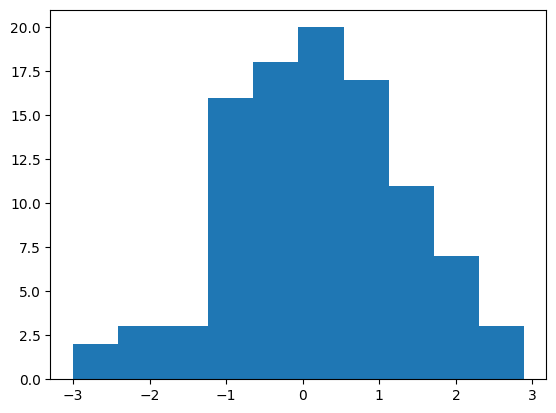

In [18]:
import matplotlib.pyplot as plt
plt.hist(X,kde=True)


In [62]:
import numpy as np
X=np.random.randn(110)

<Axes: ylabel='Count'>

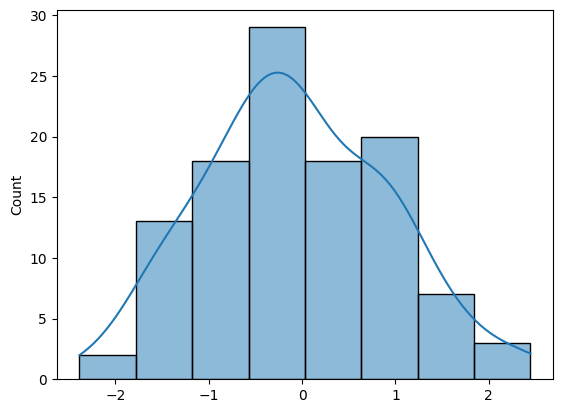

In [63]:
import seaborn as sns
sns.histplot(X, kde=True)

In [65]:
y=0.5*X**2 + 0.3*X + 0.1 + np.random.randn(110)*0.1

<Axes: ylabel='Count'>

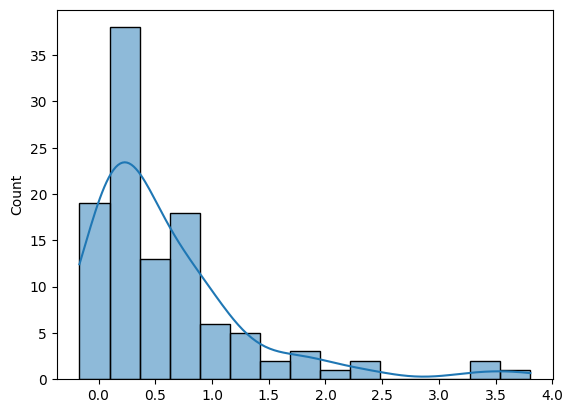

In [66]:
sns.histplot(y, kde=True)

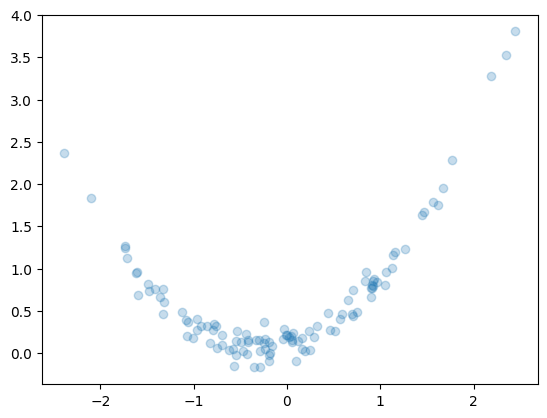

In [68]:
plt.scatter(X, y, alpha=0.25)

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2, include_bias=True)

In [74]:
X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
X_test_poly = poly.transform(X_test.reshape(-1, 1))

In [75]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)

In [76]:
regression.coef_, regression.intercept_

(array([0.        , 0.28833773, 0.509958  ]), np.float64(0.1031895492225704))

ValueError: x and y must be the same size

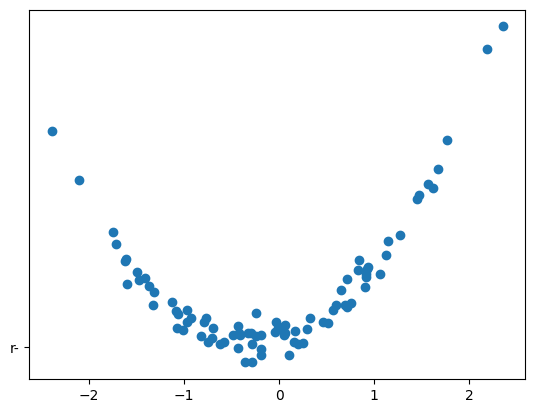

In [81]:
plt.plot(X_train, y_train, 'o', label='Train Data')
plt.scatter(regression.predict(X_train_poly), 'r-', label='Predicted Data')

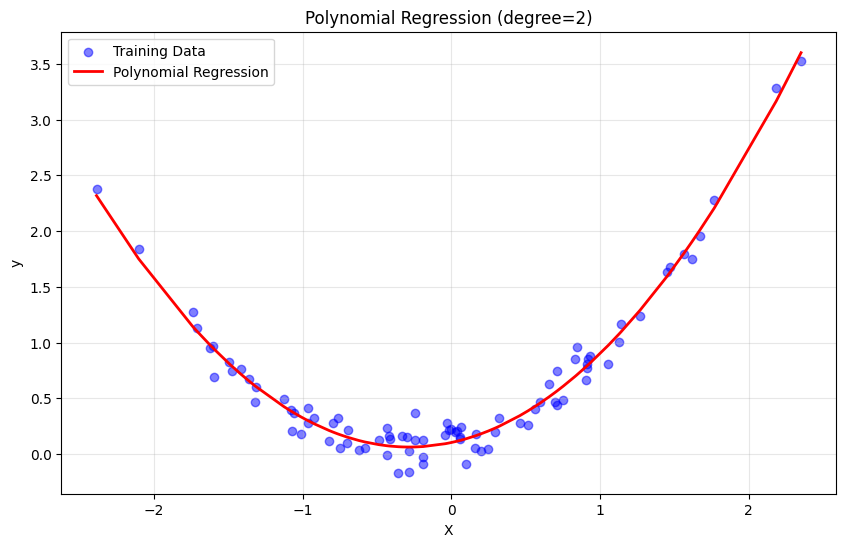

In [84]:
# Create sorted X values for smooth curve
X_sorted = np.sort(X_train.reshape(-1))
X_sorted_poly = poly.transform(X_sorted.reshape(-1, 1))

# Plot with sorted values
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Training Data')
plt.plot(X_sorted, regression.predict(X_sorted_poly), 'r-', linewidth=2, label='Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression (degree=2)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [85]:
from sklearn.pipeline import Pipeline
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,y_train) ## ploynomial and fit of linear reression
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()
    

In [86]:
poly_regression(6)

ValueError: Expected 2D array, got 1D array instead:
array=[-1.08035091e+00  5.63950210e-02  1.26980624e+00 -4.18040126e-01
  1.56714903e+00 -1.89186961e-01  9.30260867e-01 -1.92538964e-01
  2.92075504e-01 -4.88066093e-01 -4.12485204e-02 -4.35951045e-01
 -1.07303166e+00 -2.47808745e-01  8.41926110e-01  1.00431562e-01
  2.18441572e+00 -5.80641736e-01 -1.62064090e+00 -1.34352683e-02
  6.96938955e-01  6.55013896e-01 -7.92719193e-01  7.52033086e-01
 -2.10220794e+00  6.58950437e-02 -1.32323183e+00  3.98419927e-02
  5.92731651e-01  2.35118681e+00 -1.47483698e+00  1.97006808e-01
 -4.11925897e-01  9.14666410e-01  9.11930724e-01 -9.22470626e-01
  1.46945361e+00 -1.60564627e+00 -2.87801065e-01 -9.63898150e-01
  2.64387976e-02 -6.23736050e-01  1.76819615e+00  2.49545220e-01
  7.09558068e-01 -4.32023701e-01  4.59629871e-01 -7.00382176e-01
  1.66951329e+00 -1.12417198e+00  5.15065932e-01 -2.41676584e-01
 -9.66675699e-01 -6.95341348e-01 -1.01068950e+00 -1.41272773e+00
  5.64726263e-01  1.05604960e+00  1.61744300e+00 -1.71308948e+00
 -7.64954199e-01 -1.88191355e-01 -3.17127946e-02 -7.49782593e-01
 -3.29462342e-01  5.91863524e-02 -8.21231375e-01  1.14057915e+00
 -2.38587529e+00  9.05512353e-01  1.12673098e+00 -1.31608680e+00
 -2.99018026e-01  1.58245453e-01 -1.36311579e+00 -1.05970480e+00
 -1.49325748e+00 -7.24200876e-04  9.19231172e-01  7.08010120e-01
 -2.84868689e-01  1.66644679e-01 -3.57969316e-01  3.23147860e-01
 -1.74006683e+00  8.33211472e-01  1.44713193e+00 -1.59728111e+00].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.